# Game Analysis Report

The purpose of this study is to identify potential problem areas in the game and propose hypotheses for their improvement based on the analysis of data from game events.

### 1. Loading and preliminary analysis of data

At the beginning of the study, data was downloaded from a CSV file and its structure and content were analyzed.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("dataset.csv")
data.head()

,user_id,event_dt,event_type,ver,country,area_id,level_on_area_id,level_ver,tutorial_id,tutorial_action,tutorial_step,level_session_id,level_attempt,used_items_before_start,used_items_in_lvl,payment_currency_0,payment_currency_1,payment_purchase
0,ac701d71b5159c47fdee87265a3cd569,2021-05-15 01:54:38,levelStart,0.2.14,GB,1,5.0,1.0,NaN,NaN,NaN,4.485304e+17,1.0,{},NaN,NaN,NaN,NaN
1,ac701d71b5159c47fdee87265a3cd569,2021-05-15 01:56:18,levelWin,0.2.14,GB,1,5.0,1.0,NaN,NaN,NaN,4.485304e+17,1.0,{},{},NaN,NaN,NaN
2,ac701d71b5159c47fdee87265a3cd569,2021-05-15 01:56:25,tutorialStep,0.2.14,GB,1,NaN,NaN,50.0,hide,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ac701d71b5159c47fdee87265a3cd569,2021-05-15 01:56:25,tutorialStep,0.2.14,GB,1,6.0,1.0,50.0,hide,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ac701d71b5159c47fdee87265a3cd569,2021-05-15 01:56:25,tutorialStep,0.2.14,GB,1,NaN,NaN,50.0,show,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.Analysis of the distribution of players by country

In [4]:
# Distribution of players by country
country_counts = data['country'].value_counts()
country_counts

RO    161651
GB     61414
NL     34929
AU     21828
CA     19037
PL     17497
IE      1042
BE       970
BY       902
RU       785
LT       631
US       494
UA       330
KR       318
IT       311
CN        99
MY        25
Name: country, dtype: int64

***I check the distribution of payments by country (such an analysis will allow us to determine the countries in which players make more payments). There is a column payment_currency_1 and payment_currency_0. (domestic currencies)***

<AxesSubplot:xlabel='Country', ylabel='Payment amount (1)'>

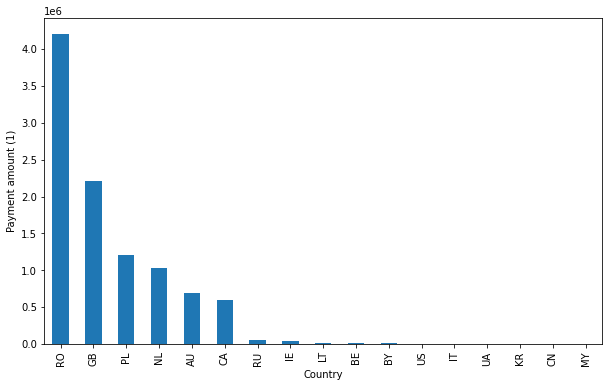

In [5]:
# Grouping data by country and summing up payment transactions
payment1_by_country = data.groupby('country')['payment_currency_1'].sum()

# Sort in descending order of the amount of payment transactions
payment1_by_country = payment1_by_country.sort_values(ascending=False)

# Visualization of results
payment1_by_country.plot(kind='bar', figsize=(10, 6), ylabel='Payment amount (1)', xlabel='Country')

<AxesSubplot:xlabel='Country', ylabel='Payment amount (0)'>

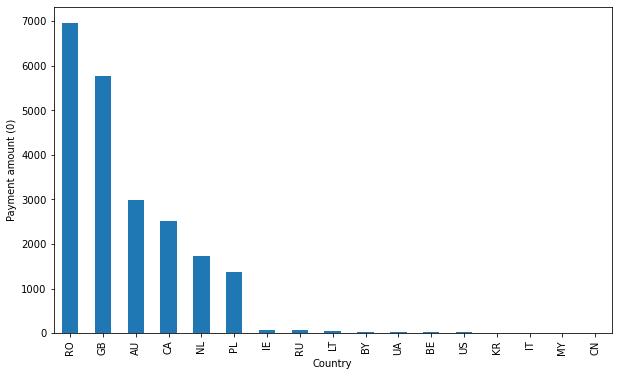

In [6]:
# Grouping data by country and summing up payment transactions
payment0_by_country = data.groupby('country')['payment_currency_0'].sum()

# Sort in descending order of the amount of payment transactions
payment0_by_country = payment0_by_country.sort_values(ascending=False)

# Visualization of results
payment0_by_country.plot(kind='bar', figsize=(10, 6), ylabel='Payment amount (0)', xlabel='Country')

**Average payment values per person by country**

<AxesSubplot:xlabel='Country', ylabel='Average payment per person (0)'>

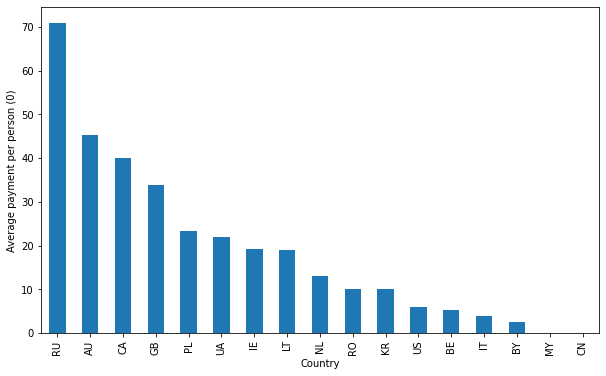

In [7]:
# Grouping data by country and counting unique users
users_by_country = data.groupby('country')['user_id'].nunique()

# Grouping data by country and summing up payment transactions
payment_by_country = data.groupby('country')['payment_currency_0'].sum()

# Calculation of the average payment per person by country
average_payment_per_person = payment_by_country / users_by_country

# Sort Ascending
average_payment_per_person = average_payment_per_person.sort_values(ascending=False)

# Visualization of results
average_payment_per_person.plot(kind='bar', figsize=(10, 6), ylabel='Average payment per person (0)', xlabel='Country')

<AxesSubplot:xlabel='Country', ylabel='Average payment per person (1)'>

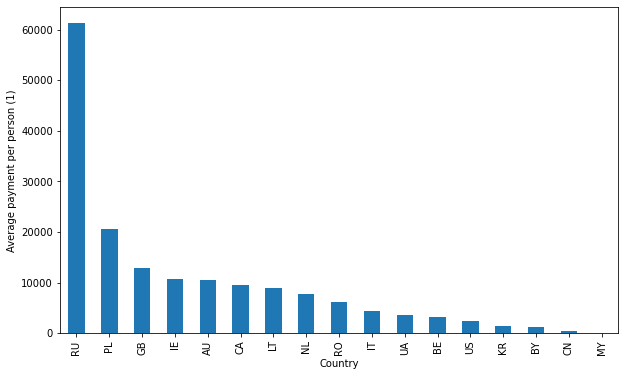

In [8]:
# Grouping data by country and counting unique users
users_by_country = data.groupby('country')['user_id'].nunique()

# Grouping data by country and summing up payment transactions
payment_by_country = data.groupby('country')['payment_currency_1'].sum()

# Calculation of the average payment per person by country
average_payment_per_person = payment_by_country / users_by_country

# Sort Ascending
average_payment_per_person = average_payment_per_person.sort_values(ascending=False)

# Visualization of results
average_payment_per_person.plot(kind='bar', figsize=(10, 6), ylabel='Average payment per person (1)', xlabel='Country')

### 3. Analysis of the distribution of events by type

In [9]:
aaa = data['event_type'].unique()
aaa

array(['levelStart', 'levelWin', 'tutorialStep',
       'virtualCurrencyPurchase', 'levelLoss'], dtype=object)

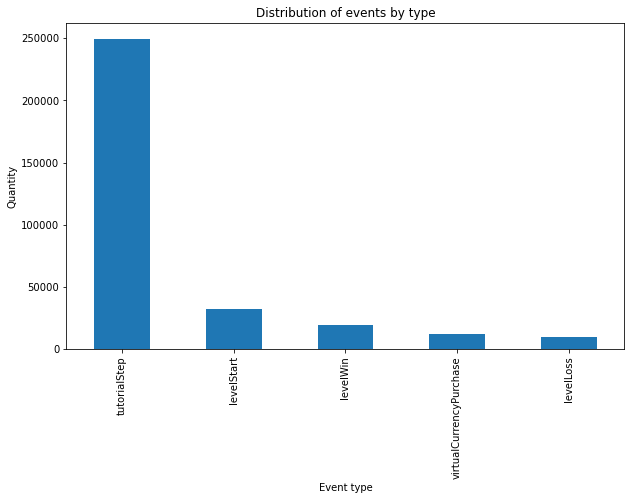

In [10]:
# Analysis of the distribution of events by type
event_counts = data['event_type'].value_counts()
event_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of events by type')
plt.xlabel('Event type')
plt.ylabel('Quantity')
plt.show()

### 4. Tutorial conversion analysis

In [11]:
# Tutorial conversion analysis
tutorial_conversion = data['tutorial_id'].nunique() / data['user_id'].nunique()
print("Tutorial completion conversion:", tutorial_conversion)

Tutorial completion conversion: 0.025833333333333333


### 5. Analysis of the average number of attempts to start a level per player

In [12]:
# Analysis of the average number of attempts to start a level per player
average_attempts_per_player = data.groupby('user_id')['level_attempt'].max().mean()
print("Average number of attempts to start a level per player:", average_attempts_per_player)

Average number of attempts to start a level per player: 7.2923336141533275


### 6. Analysis of the use of items

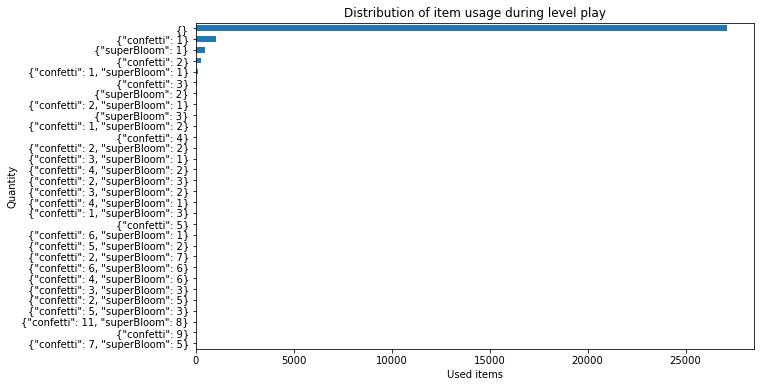

In [13]:
# Analysis of the use of items during the game at the level
used_items_in_lvl_counts = data['used_items_in_lvl'].value_counts(ascending=True)
used_items_in_lvl_counts.plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of item usage during level play')
plt.xlabel('Used items')
plt.ylabel('Quantity')
plt.show()

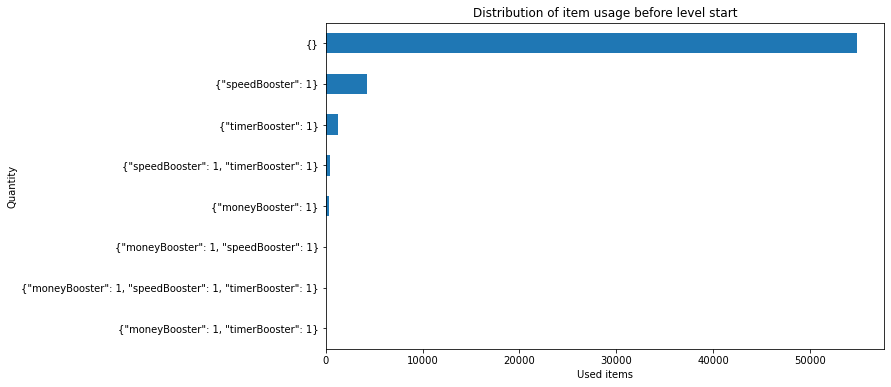

In [14]:
# Analysis of the use of items before starting the level
used_items_before_start_counts = data['used_items_before_start'].value_counts(ascending=True)
used_items_before_start_counts.plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of item usage before level start')
plt.xlabel('Used items')
plt.ylabel('Quantity')
plt.show()

### 7. Analysis of versions in the game

In [15]:
# All existing versions in the game
ver_types = data['ver'].unique()
ver_types

array(['0.2.14', '0.2.13', '0.2.12', '0.2.15', '0.2.11'], dtype=object)

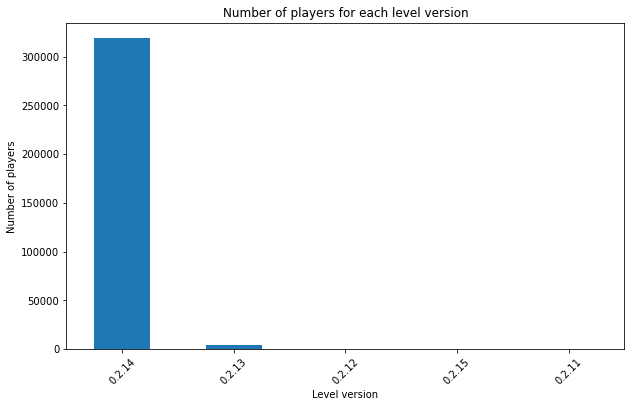

In [16]:
# Counting the number of players for each version of the level
version_counts = data['ver'].value_counts()

# Create a graph
plt.figure(figsize=(10, 6))
version_counts.plot(kind='bar')
plt.xlabel('Level version')
plt.ylabel('Number of players')
plt.title('Number of players for each level version')
plt.xticks(rotation=45)
plt.show()

# Output (report):

**1.Analysis of the distribution of players by country**

Analyzed the distribution of players by country to determine the main countries from which the largest number of players come. Used a bar chart to visualize the results. Based on the analysis, I made the following conclusions:

The country **RO** is the leader in the number of players, exceeding other countries.
Countries **GB, NL, AU, CA, PL** also have a significant number of players, but their number is less than that of the country **RO**.

Next, the distribution of payments by country was checked (such an analysis will allow us to determine the countries in which players make more payments). There is a column payment_currency_1 and payment_currency_0. (domestic currencies). The analysis showed that payment_currency_1 receives the most donations from **RO**. And in payment_currency_0 - **RO** and **GB**.

But after conducting an analysis and calculating the average payment per person by country, it turned out that in **RU** they donate the most to the percentage of the entire playing audience.

``Total: differences in payment habits and preferences by country: Analysis of payments by country showed that different countries have different preferences in payment currencies and volume of payments. This may be due to differences in payment systems, cultural habits or the availability of alternative payment methods. It is important to take these differences into account when developing a game monetization strategy and providing payment options to meet the needs of players from different countries.``

**2. Analysis of event distribution by type**

After analyzing the data, I found that most of the events were of the "tutorialStep" type, which may indicate that players spend most of their time in the tutorial and may have difficulty or difficulty completing it.

``Total: possible problem areas that can be identified based on this information:``
* Difficulties in completing the tutorial: A large number of events of the "tutorialStep" type may indicate difficulties or lack of understanding by players of the tutorial process. It may be necessary to analyze specific steps and tasks in the tutorial in more detail to identify difficulties players are experiencing and make improvements accordingly.
* Tutorial is unintuitive: If players spend a lot of time in the tutorial, this may indicate that the learning process is unintuitive or unclear. Perhaps we need to improve the presentation of information, add more hints or feedback to help players better understand and master the core mechanics of the game.
* Tutorial Optimization: Studying the tutorial itself can help identify opportunities for optimization. You might consider shortening or simplifying the tutorial process to help players learn the game faster and more efficiently.

**3. Tutorial conversion analysis**

Tutorial completion conversion: 0.0258.

``Total: low tutorial completion conversion: If the tutorial completion conversion is low (0.0258), this may indicate that the tutorial process is difficult or unclear. Players may be having difficulty mastering the basic mechanics of the game or may not be receiving enough information or guidance.``

**4. Analysis of the average number of attempts to start a level per player**

Average number of attempts to start a level per player: 7.29. This may indicate difficulty or insufficient information about the requirements and objectives of the levels.

``Total: high average number of level attempts per player: The average number of level attempts per player is 7.2923. This may indicate difficulty or insufficient information about the requirements and objectives of the levels. Players may not be receiving enough feedback or hints to successfully complete the level.``

**5. Item Usage Analysis**

The analysis showed that most players do not use items during the game.

``Total: low use of items during the game: From the data provided, it is clear that most players do not use items during the game. This may indicate ineffective or unattractive items for gameplay. Item designs and effects may need to be reconsidered to make them more useful and attractive to players.``

**6. Analysis of versions in the game**

``Most players are using the latest version of the game (2.14): This may indicate that the updates and changes made in the latest version were attractive to players.``